In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# Step 2: Load the dataset
df = pd.read_csv('/Users/karim/Desktop/My Profile/real-estate-intelligence/Data/Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:

df.drop(columns=["No"], inplace=True)
df.columns = [
    "transaction_date", "house_age", "distance_to_mrt", "convenience_stores",
    "latitude", "longitude", "price_per_unit"
]
df.head(2)

,transaction_date,house_age,distance_to_mrt,convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
house_age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
distance_to_mrt,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
convenience_stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
price_per_unit,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


In [5]:
df.isnull().sum()

transaction_date      0
house_age             0
distance_to_mrt       0
convenience_stores    0
latitude              0
longitude             0
price_per_unit        0
dtype: int64

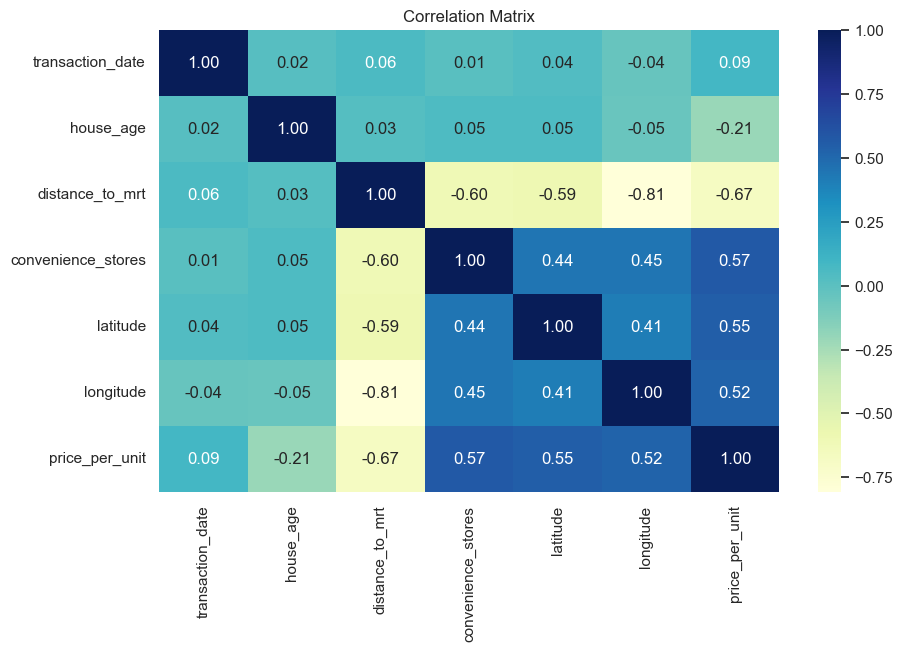

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [7]:
# Check and display the column names to verify correct formatting
df = pd.read_csv('/mnt/data/Real estate.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Real estate.csv'

In [8]:
# Check and display the column names to verify correct formatting
df = pd.read_csv('/Users/karim/Desktop/My Profile/real-estate-intelligence/Data/Real estate.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns


Index(['no', 'x1_transaction_date', 'x2_house_age',
       'x3_distance_to_the_nearest_mrt_station',
       'x4_number_of_convenience_stores', 'x5_latitude', 'x6_longitude',
       'y_house_price_of_unit_area'],
      dtype='object')

In [10]:
# Rename for easier reference
df = df.rename(columns={
    'x2_house_age': 'house_age',
    'x3_distance_to_the_nearest_mrt_station': 'distance_to_mrt',
    'x4_number_of_convenience_stores': 'convenience_stores',
    'x5_latitude': 'latitude',
    'x6_longitude': 'longitude',
    'y_house_price_of_unit_area': 'price_per_unit'
})


In [11]:
# Select features for clustering
features = ['house_age', 'distance_to_mrt', 'convenience_stores', 'latitude', 'longitude']
X = df[features]

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
from sklearn.cluster import KMeans

In [17]:
# Elbow method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

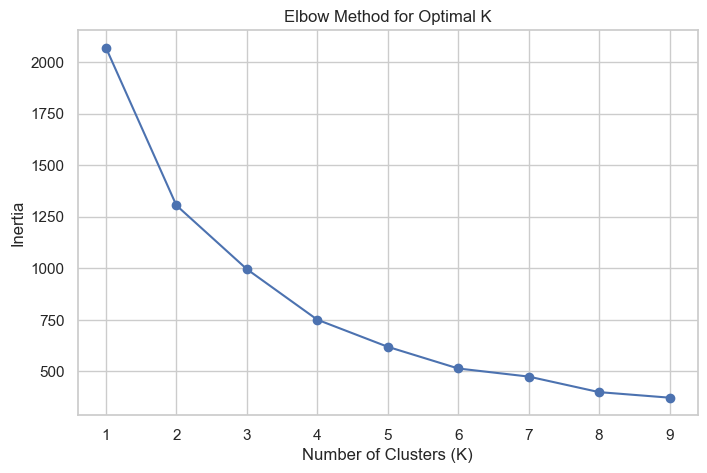

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [19]:

optimal_k = 3  

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

df[['house_age', 'distance_to_mrt', 'convenience_stores', 'latitude', 'longitude', 'cluster']].head()


,house_age,distance_to_mrt,convenience_stores,latitude,longitude,cluster
0,32.0,84.87882,10,24.98298,121.54024,2
1,19.5,306.59470,9,24.98034,121.53951,2
2,13.3,561.98450,5,24.98746,121.54391,1
3,13.3,561.98450,5,24.98746,121.54391,1
4,5.0,390.56840,5,24.97937,121.54245,1


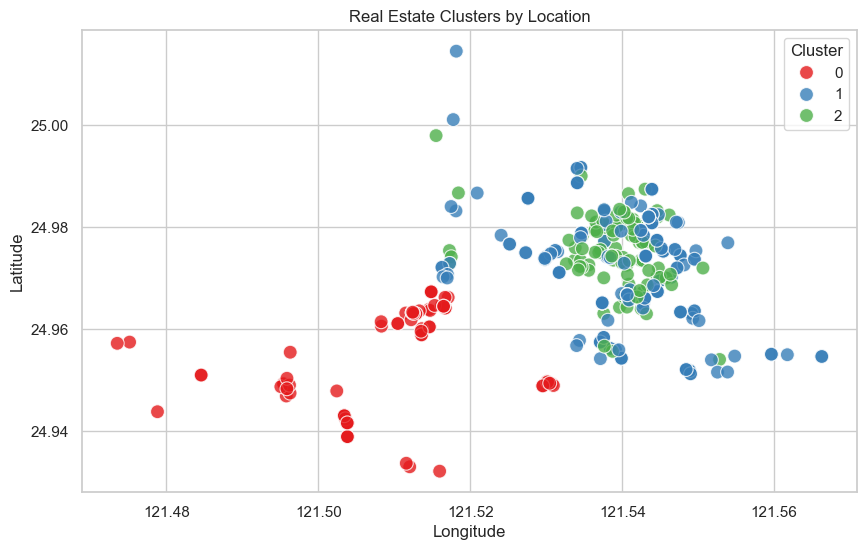

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# نرسم scatter plot مع التلوين حسب الكلاستر
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='longitude', y='latitude', hue='cluster',
    data=df, palette='Set1', s=100, alpha=0.8
)
plt.title('Real Estate Clusters by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test_scaled)

In [35]:

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 5.35
RMSE: 7.39
R2 Score: 0.67


In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

# تقييم الأداء
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R2 Score: {r2_rf:.2f}")

Random Forest MAE: 4.25
Random Forest RMSE: 5.89
Random Forest R2 Score: 0.79


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:

df.to_csv('real_estate_cleaned.csv', index=False)